# Trajectory inference for hematopoiesis in mouse

Reconstructing myeloid and erythroid differentiation for data of [Paul et al. (2015)](http://doi.org/10.1016/j.cell.2015.11.013).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc
import utils as ut
import glob
from sklearn.metrics import classification_report
from scipy.stats import pearsonr
from utils import de_score
import random
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ranksums,ttest_ind


In [2]:
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=300, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

In [3]:
# List all files in the directoty
h5ad_list = glob.glob("F:/ws/pyws/trainsource/saved/adata/review/*.h5ad")

In [4]:
h5ad_list

['F:/ws/pyws/trainsource/saved/adata/review\\GSE1108941214data_GSE110894_drug_I.BET.762_bottle_128_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_T_lr_0.01_mod_new_sam_downsampling.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE1122741214data_GSE112274_drug_GEFITINIB_bottle_64_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_T_lr_0.1_mod_new_sam_no.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE117872_HN1201214data_GSE117872_HN120_drug_CISPLATIN_bottle_32_edim_256,128_pdim_128,64_model_DAE_dropout_0.3_gene_F_lr_0.5_mod_new_sam_SMOTE.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE117872_HN120integratedata_GSE117872_HN120_drug_CISPLATIN_bottle_512_edim_512,256_pdim_128,64_model_DAE_dropout_0.3_gene_T_lr_0.1_mod_new_sam_downsampling.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE117872_HN1371214data_GSE117872_HN137_drug_CISPLATIN_bottle_64_edim_256,128_pdim_128,64_model_DAE_dropout_0.3_gene_F_lr_0.1_mod_new_sam_upsampling.h5ad',
 'F:/ws/pyws/train

In [5]:
CELL_TYPE_KEY = {"GSE117872_HN137":"cell_color","GSE117872_HN120":"cell_color","GSE110894":"Sample name","GSE140440":"sensitivity","GSE112274":"sensitivity",
                "GSE149383":"sensitivity"}

In [6]:
h5ad_list

['F:/ws/pyws/trainsource/saved/adata/review\\GSE1108941214data_GSE110894_drug_I.BET.762_bottle_128_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_T_lr_0.01_mod_new_sam_downsampling.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE1122741214data_GSE112274_drug_GEFITINIB_bottle_64_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_T_lr_0.1_mod_new_sam_no.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE117872_HN1201214data_GSE117872_HN120_drug_CISPLATIN_bottle_32_edim_256,128_pdim_128,64_model_DAE_dropout_0.3_gene_F_lr_0.5_mod_new_sam_SMOTE.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE117872_HN120integratedata_GSE117872_HN120_drug_CISPLATIN_bottle_512_edim_512,256_pdim_128,64_model_DAE_dropout_0.3_gene_T_lr_0.1_mod_new_sam_downsampling.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/review\\GSE117872_HN1371214data_GSE117872_HN137_drug_CISPLATIN_bottle_64_edim_256,128_pdim_128,64_model_DAE_dropout_0.3_gene_F_lr_0.1_mod_new_sam_upsampling.h5ad',
 'F:/ws/pyws/train

In [7]:
# f= h5ad_list[0]
# adata = sc.read_h5ad(filename=f)
# adata.X.shape

In [8]:
h5ad_list = [h5ad_list[0]]

In [9]:
intested = "GSE110894"

In [10]:
h5ad_list

['F:/ws/pyws/trainsource/saved/adata/review\\GSE1108941214data_GSE110894_drug_I.BET.762_bottle_128_edim_512,256_pdim_256,128_model_DAE_dropout_0.1_gene_T_lr_0.01_mod_new_sam_downsampling.h5ad']

In [11]:
h5ad_ae_list = glob.glob("F:/ws/pyws/trainsource/saved/adata/AE/*.h5ad")

In [12]:
h5ad_ae_list

['F:/ws/pyws/trainsource/saved/adata/AE\\GSE110894integrate_data_GSE110894_drug_I.BET.762_bottle_128_edim_512,256_pdim_256,128_model_AE_dropout_0.1_gene_F_lr_0.01_mod_new_sam_downsampling.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/AE\\GSE112274integrate_data_GSE112274_drug_GEFITINIB_bottle_64_edim_512,256_pdim_256,128_model_AE_dropout_0.1_gene_F_lr_0.1_mod_new_sam_no.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/AE\\GSE117872_HN137integrate_data_GSE117872_HN137_drug_CISPLATIN_bottle_64_edim_256,128_pdim_128,64_model_AE_dropout_0.3_gene_F_lr_0.1_mod_new_sam_upsampling.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/AE\\GSE140440integrate_data_GSE140440_drug_DOCETAXEL_bottle_512_edim_256,128_pdim_256,128_model_AE_dropout_0.3_gene_F_lr_0.01_mod_new_sam_no.h5ad',
 'F:/ws/pyws/trainsource/saved/adata/AE\\GSE149383integrate_data_GSE149383_drug_ERLOTINIB_bottle_512_edim_512,256_pdim_256,128_model_AE_dropout_0.1_gene_F_lr_0.1_mod_new_sam_SMOTE.h5ad']

# Generated 3 figures comparing before, after tarnsfer, ground truth

And it will save the F1 score before and after the transfer learning

In [13]:
# Random score test
def ran_test_score(adata,n_iters=1000):
    ran_results1 = []
    ran_results2 = []

    s_score,s_pval = pearsonr(adata.obs["1_score"],adata.obs["Sensitive_score"])
    r_score,r_pval = pearsonr(adata.obs["0_score"],adata.obs["Resistant_score"])


    for i in range(0,n_iters):

        gl1 = random.sample(list(adata.var.index),50)
        adata=sc.tl.score_genes(adata, gene_list=gl1,score_name="l1_score",copy=True)

        rand_score1,rand_pval1 = pearsonr(adata.obs["l1_score"],adata.obs["Sensitive_score"])
        rand_score2,rand_pval2 = pearsonr(adata.obs["l1_score"],adata.obs["Resistant_score"])

        ran_results1.append(rand_score1)
        ran_results2.append(rand_score2)
        
        
    return adata,ran_results1, s_score,s_pval ,ran_results2,r_score,r_pval

In [14]:
def p_string(l,score):
    score = sum(l>=score)/len(l)
    if(score==0):
        return "p < 0.001"
    else:
        return "p =" + " "+str(score)

In [15]:
# adata.obs

Index(['Plate#', 'Well position', 'Sample name', 'Index-Sort condition',
       'Well index', 'sensitive', 'sensitivity', 'Sensitive_score',
       'Resistant_score', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps',
       'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden',
       'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds',
       'sens_label', 'rest_preds'],
      dtype='object')



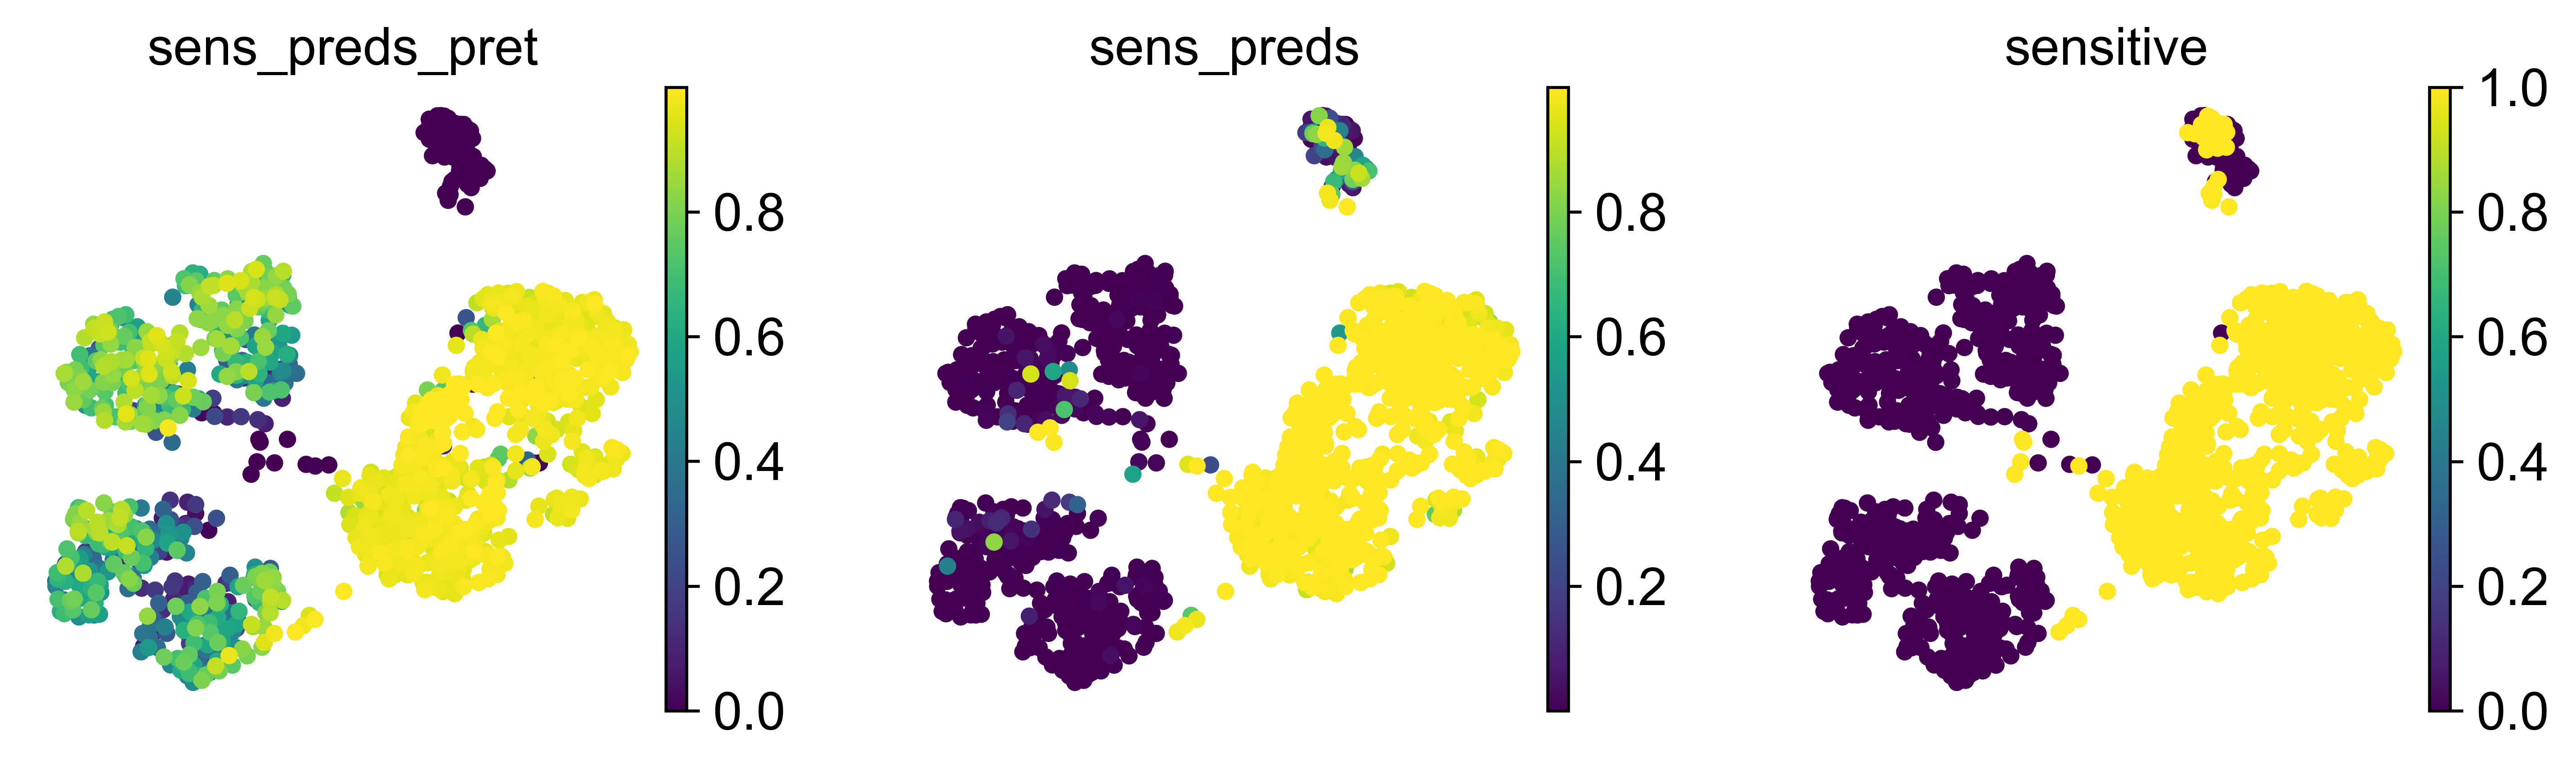

Trying to set attribute `._uns` of view, copying.


In [16]:
from sklearn.metrics import (auc, average_precision_score,
                             classification_report, mean_squared_error,
                             precision_recall_curve, r2_score, roc_auc_score)

names = []
score = []
model = []

interes_adata = None

for f in h5ad_list:
    
    
    adata = sc.read_h5ad(filename=f)
    
    
    if(f.find("117872")>0):
        adata = adata[adata.obs['cluster']!="Holiday"]

    pretrain_label = adata.obs['sens_label_pret']
    sens_label = adata.obs['sens_label']
    
        
    print(adata.obs.columns)

    grouth_truth = adata.obs['sensitive']
    sens_pb_pret = adata.obs['sens_preds_pret']
    sens_label_pret = adata.obs['sens_label_pret']
    sens_pb = adata.obs['sens_preds']

    name = f.split("1214")[0].split("\\")[1]
    
    if(name=="GSE110894"):
        adata=adata[(adata.obs["Sample name"] != "EMPTY") & \
                    (adata.obs["Sample name"] != "EMPTY ") ,: ]
    
    
    
    report_dict_pret = classification_report(grouth_truth, pretrain_label, output_dict=True)
    classification_report_pret_df = pd.DataFrame(report_dict_pret).T
    f1score_pret = report_dict_pret['weighted avg']['f1-score']
    ap_pret = average_precision_score(grouth_truth, sens_pb_pret)
    auroc_pret = roc_auc_score(grouth_truth, sens_label_pret)

    
    report_dict = classification_report(grouth_truth, sens_label, output_dict=True)
    classification_report_df = pd.DataFrame(report_dict).T
    f1score = report_dict['weighted avg']['f1-score']
    ap = average_precision_score(grouth_truth, sens_pb)
    auroc = roc_auc_score(grouth_truth, sens_label)
    
    names.append(name)
    score.append(f1score_pret)
    model.append("before")
    
    names.append(name)
    score.append(f1score)
    model.append("transfer")

    result = pd.DataFrame({"f1":[f1score_pret,f1score],
                          "ap":[ap_pret,ap],
                          "auroc":[auroc_pret,auroc]},index=["pretrain","transfer"])
    
    print()
    # Save the figure
    sc.pl.umap(adata,color=['sens_preds_pret','sens_preds','sensitive'],save="report_compare"+name + '.tiff')
    # Save the f1 score before and after
    result.to_csv("saved/results/report_compare"+name + '.csv')
    
    # Cal pred senstivie score
    adata = ut.de_score(adata,clustername='sens_label')
    
    if(f.find(intested)>0):
        interes_adata = adata

In [17]:
adata=interes_adata

In [18]:
result_compare = pd.DataFrame({"data":names,
                      "transfer":model,
                      "score":score})

In [19]:
adata

AnnData object with n_obs × n_vars = 1404 × 6644
    obs: 'Plate#', 'Well position', 'Sample name', 'Index-Sort condition', 'Well index', 'sensitive', 'sensitivity', 'Sensitive_score', 'Resistant_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps', 'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden', 'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds', 'sens_label', 'rest_preds', '0_score', '1_score'
    var: 'n_cells', 'mt-', 'rps', 'rpl', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pre', 'X_umap', 'X_umap_origin'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

# Plot the umap highlighting the wrong predictions

In [20]:
idx = adata.obs["sensitive"] != adata.obs["sens_label"]

In [21]:
adata.obs['wrong'] = pd.NA

In [22]:
adata.obs.loc[idx,'wrong'] = "Wrong"
adata.obs['wrong'] = adata.obs.wrong.astype('category')

In [23]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Sensitive_score,Resistant_score,n_genes,...,leiden,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,sens_label,rest_preds,0_score,1_score,wrong
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,3,3,0.527935,1,0.000138,0,0.999864,1.109898,-0.203557,NaN
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,3,3,0.676591,1,0.000264,0,0.999738,1.048748,-0.131910,NaN
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,3,3,0.746028,1,0.006229,0,0.993606,0.994504,-0.180628,NaN
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,3,3,0.387372,0,0.000051,0,0.999950,1.115945,-0.245210,NaN
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,3,3,0.493321,0,0.000098,0,0.999904,1.205736,-0.238544,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P17,RPI7,P17,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,GTCACGTA,0,Resistant,-1.414444,7.688226,5183,...,1,1,0.104751,0,0.000162,0,0.999839,1.122292,-0.198176,NaN
RPI7_P18,RPI7,P18,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,ACGTGTGT,0,Resistant,-1.348788,8.079032,5421,...,1,1,0.476262,0,0.001626,0,0.998354,1.037778,-0.238987,NaN
RPI7_P19,RPI7,P19,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,TCAGCGTA,0,Resistant,-1.234040,8.462097,5293,...,1,1,0.315842,0,0.000260,0,0.999741,1.276316,-0.233136,NaN
RPI7_P20,RPI7,P20,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,AGAAGAGG,0,Resistant,-0.823939,5.184032,4101,...,1,1,0.086513,0,0.006288,0,0.993544,1.136913,-0.189650,NaN


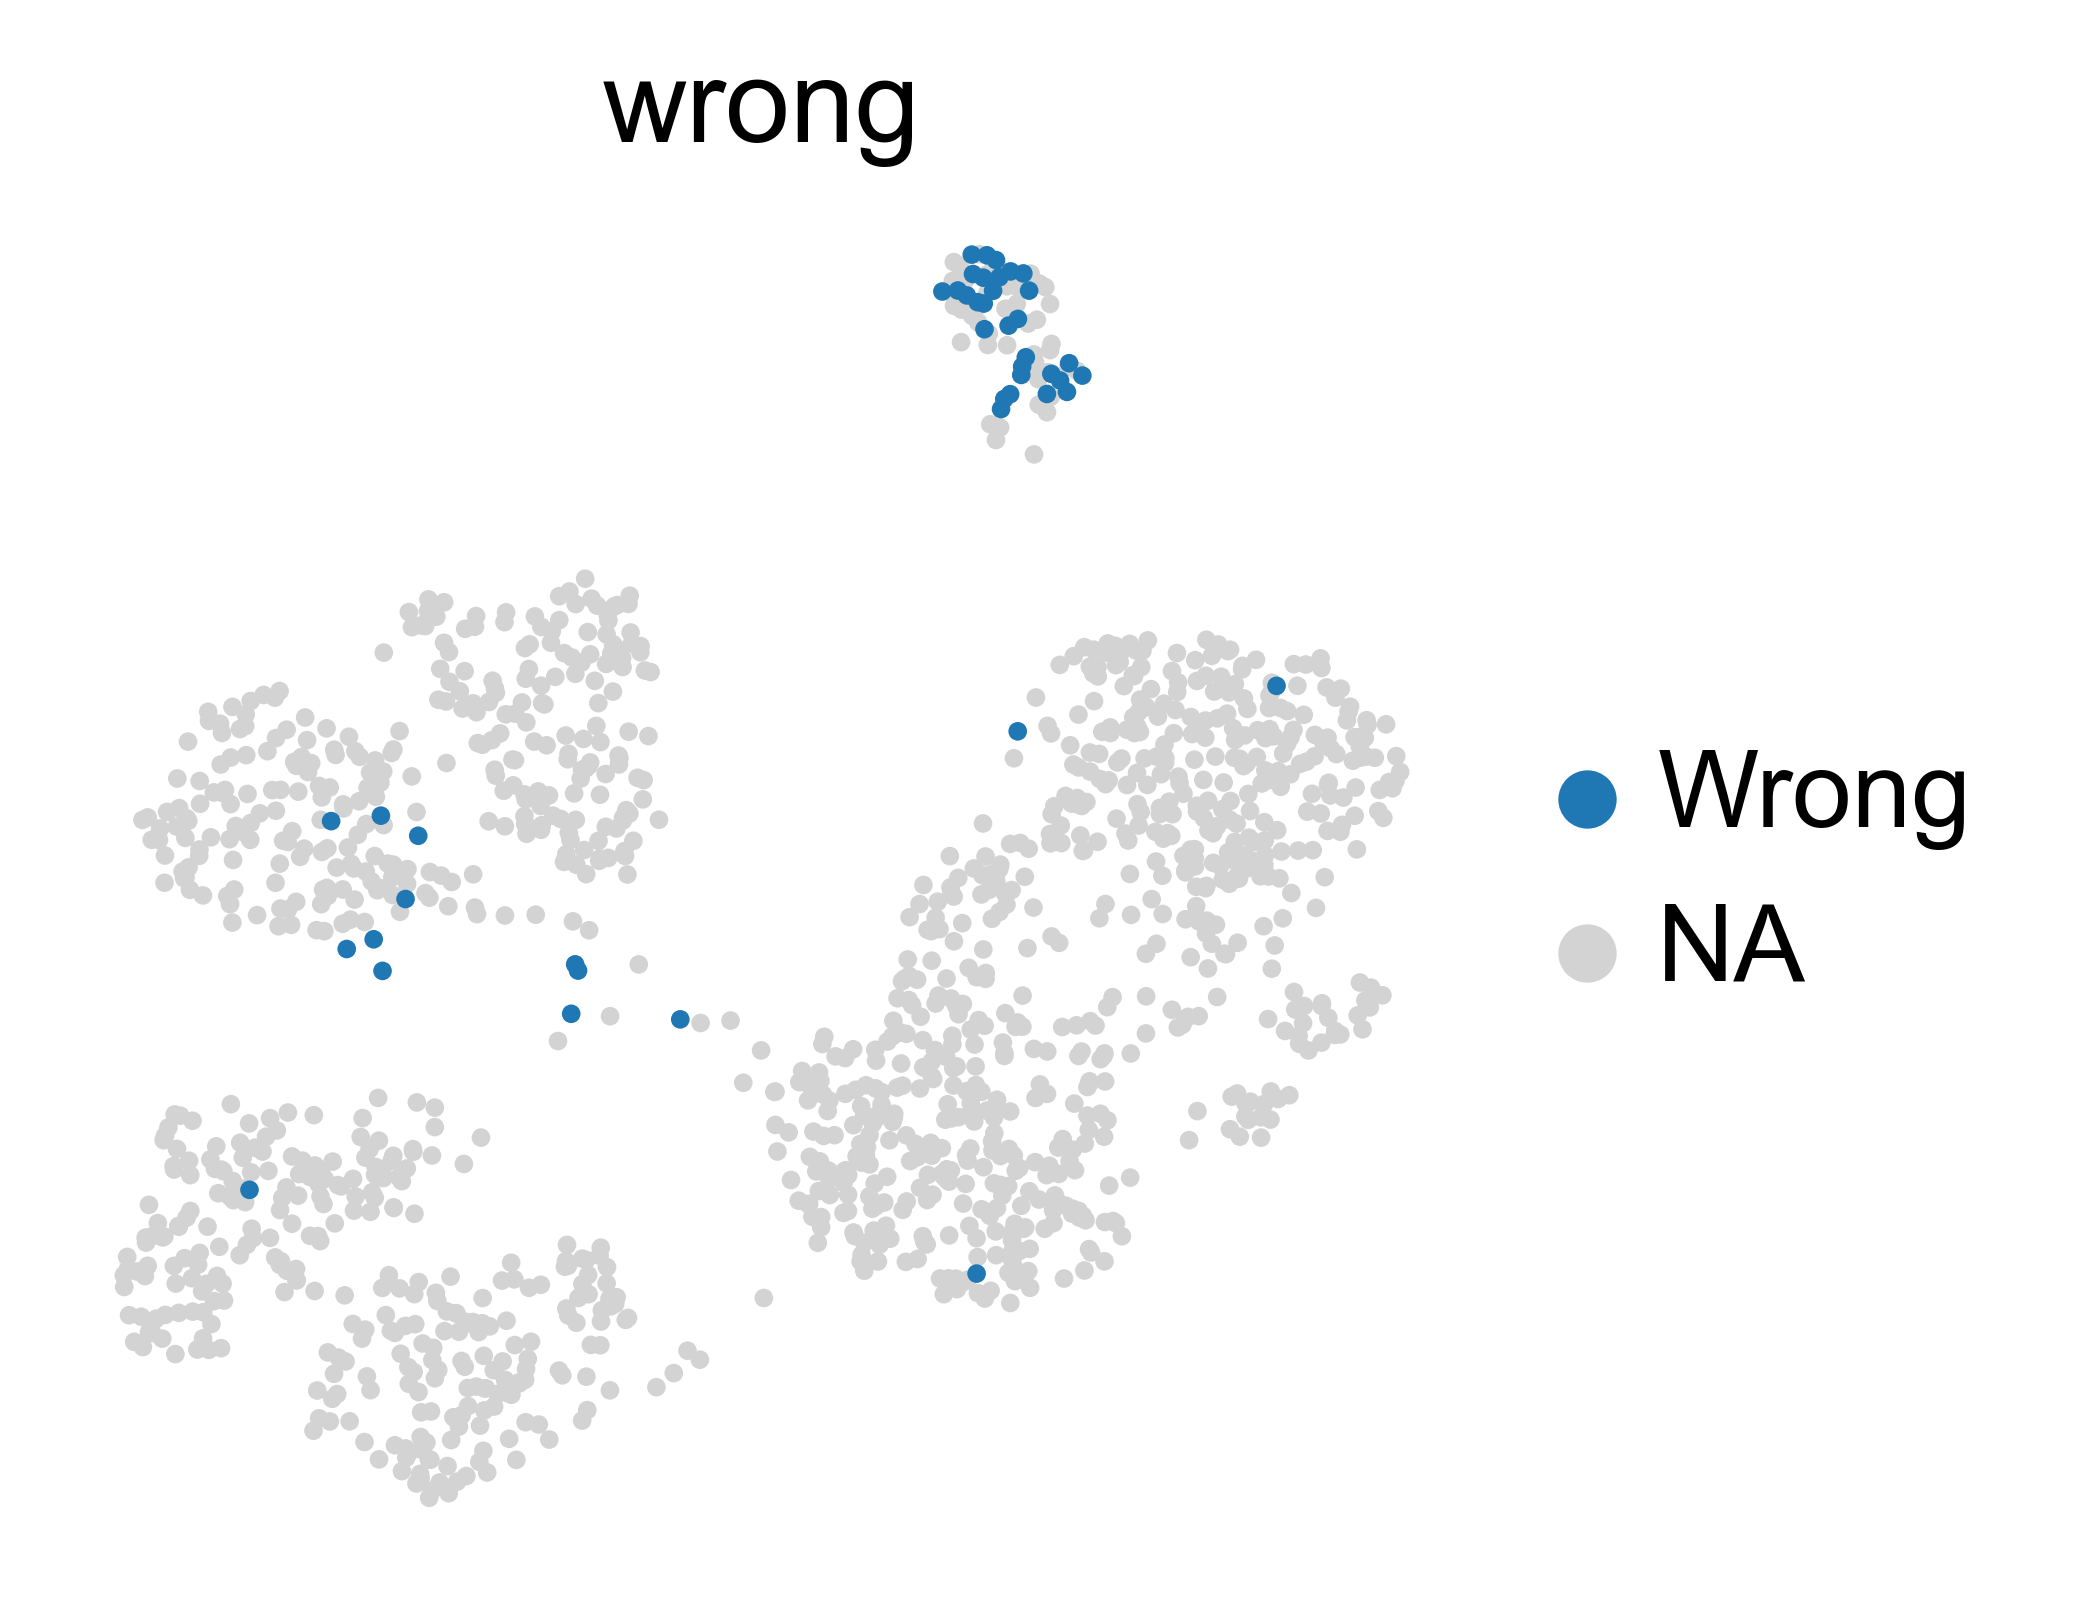

In [24]:
sc.pl.umap(adata,color="wrong",size=20)

In [25]:
name = intested

In [26]:
df = adata.obs[[CELL_TYPE_KEY[name],"wrong"]]\
.groupby([CELL_TYPE_KEY[name]])\
.aggregate(['count','size'])\
.reset_index()
df['data'] = name
df

Sample name wrong            data
                                        count size           
0                      101 CELL CONTROL     3    4  GSE110894
1              MA9 IBET RESISTANT CELLS    15  345  GSE110894
2  MA9 IBET RESISTANT CELLS- WITHDRAWAL     9  340  GSE110894
3                    MA9 PARENTALS DMSO    10  372  GSE110894
4            MA9 PARENTALS IBET 400NMOL     8  343  GSE110894

In [27]:
result_compare

,data,transfer,score
0,GSE110894,before,0.649327
1,GSE110894,transfer,0.961950


# Barplot of score before and after the transfer

In [28]:

# sc.settings.set_figure_params(dpi=800, frameon=False, figsize=(5, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures
# g = sns.barplot(x="data", y="score",hue="transfer",palette="Greens_r",
#                 data=result_compare)
# plt.legend().remove()
# sns.despine(bottom = True, left = True)

# plt.setp(g.get_xticklabels(), rotation=-45)

# Figure 2 A panel

In [29]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,sensitivity,Sensitive_score,Resistant_score,n_genes,...,leiden,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,sens_label,rest_preds,0_score,1_score,wrong
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,3,3,0.527935,1,0.000138,0,0.999864,1.109898,-0.203557,NaN
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,3,3,0.676591,1,0.000264,0,0.999738,1.048748,-0.131910,NaN
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,3,3,0.746028,1,0.006229,0,0.993606,0.994504,-0.180628,NaN
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,3,3,0.387372,0,0.000051,0,0.999950,1.115945,-0.245210,NaN
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,3,3,0.493321,0,0.000098,0,0.999904,1.205736,-0.238544,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P17,RPI7,P17,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,GTCACGTA,0,Resistant,-1.414444,7.688226,5183,...,1,1,0.104751,0,0.000162,0,0.999839,1.122292,-0.198176,NaN
RPI7_P18,RPI7,P18,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,ACGTGTGT,0,Resistant,-1.348788,8.079032,5421,...,1,1,0.476262,0,0.001626,0,0.998354,1.037778,-0.238987,NaN
RPI7_P19,RPI7,P19,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,TCAGCGTA,0,Resistant,-1.234040,8.462097,5293,...,1,1,0.315842,0,0.000260,0,0.999741,1.276316,-0.233136,NaN
RPI7_P20,RPI7,P20,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,AGAAGAGG,0,Resistant,-0.823939,5.184032,4101,...,1,1,0.086513,0,0.006288,0,0.993544,1.136913,-0.189650,NaN


In [30]:
adata.obs["pred_binary"] = adata.obs["sens_label"]
adata.obs.sens_label = adata.obs.sens_label.cat.rename_categories({1:"Sensitive", 0:"Resistant"})

In [31]:
#adata.obs.sensitivity = adata.obs.sensitivity.cat.rename_categories({"Sensitive":"Response", "Resistant":"Resistant"})

In [32]:
adata.obs=adata.obs.rename(columns={"sensitivity": "Ground Truth", "sens_label": "Prediction"})

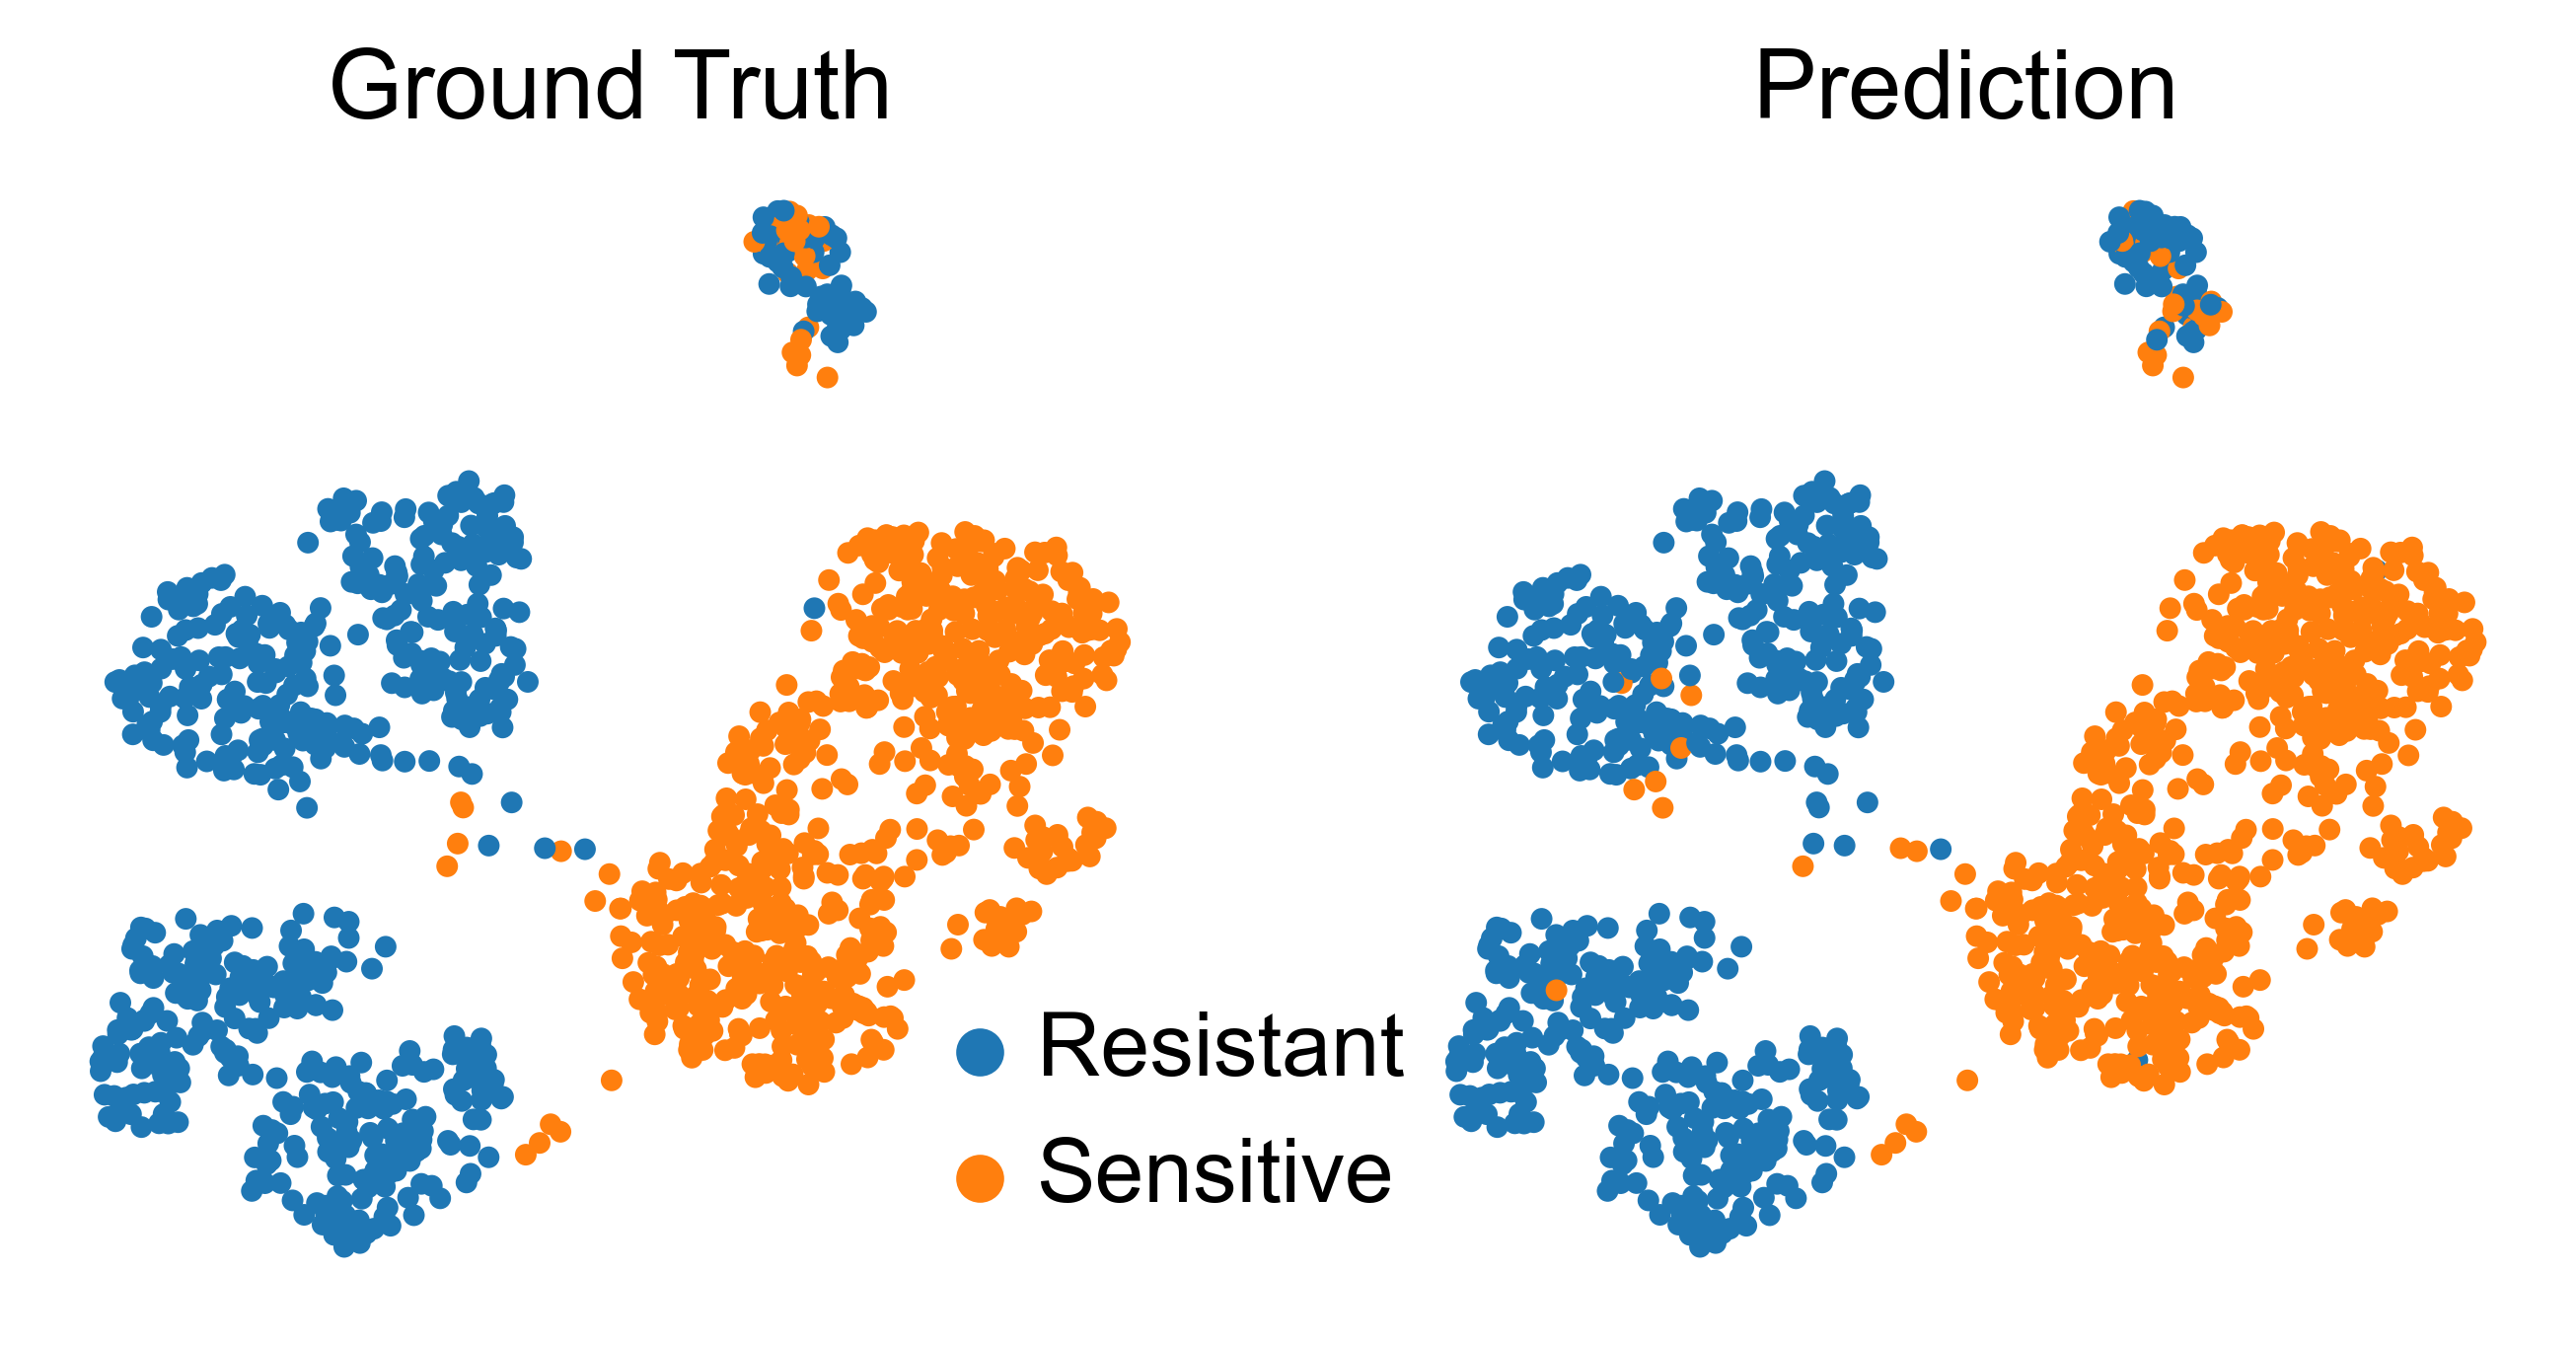

In [33]:
sc.settings.set_figure_params(dpi=250, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures
ax = sc.pl.umap(adata,color=['Ground Truth',"Prediction"],size=40,show=False,wspace=0.1)
ax[0].legend().remove()
ax[1].legend(loc ='lower center',bbox_to_anchor=(-0.2, 0),frameon=False) 
plt.savefig("saved/figures/figure2A_1"+name + ".tiff")

In [34]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,Ground Truth,Sensitive_score,Resistant_score,n_genes,...,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,Prediction,rest_preds,0_score,1_score,wrong,pred_binary
RPI1_A3,RPI1,A3,MA9 IBET RESISTANT CELLS,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,3,0.527935,1,0.000138,Resistant,0.999864,1.109898,-0.203557,NaN,0
RPI1_A4,RPI1,A4,MA9 IBET RESISTANT CELLS,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,3,0.676591,1,0.000264,Resistant,0.999738,1.048748,-0.131910,NaN,0
RPI1_A5,RPI1,A5,MA9 IBET RESISTANT CELLS,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,3,0.746028,1,0.006229,Resistant,0.993606,0.994504,-0.180628,NaN,0
RPI1_A6,RPI1,A6,MA9 IBET RESISTANT CELLS,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,3,0.387372,0,0.000051,Resistant,0.999950,1.115945,-0.245210,NaN,0
RPI1_A7,RPI1,A7,MA9 IBET RESISTANT CELLS,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,3,0.493321,0,0.000098,Resistant,0.999904,1.205736,-0.238544,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P17,RPI7,P17,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,GTCACGTA,0,Resistant,-1.414444,7.688226,5183,...,1,0.104751,0,0.000162,Resistant,0.999839,1.122292,-0.198176,NaN,0
RPI7_P18,RPI7,P18,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,ACGTGTGT,0,Resistant,-1.348788,8.079032,5421,...,1,0.476262,0,0.001626,Resistant,0.998354,1.037778,-0.238987,NaN,0
RPI7_P19,RPI7,P19,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,TCAGCGTA,0,Resistant,-1.234040,8.462097,5293,...,1,0.315842,0,0.000260,Resistant,0.999741,1.276316,-0.233136,NaN,0
RPI7_P20,RPI7,P20,MA9 IBET RESISTANT CELLS- WITHDRAWAL,GR-,AGAAGAGG,0,Resistant,-0.823939,5.184032,4101,...,1,0.086513,0,0.006288,Resistant,0.993544,1.136913,-0.189650,NaN,0


In [35]:
try:
    adata.obs["Sample name"] = adata.obs["cell_color"]
except:
    adata.obs["Sample name"] = adata.obs["Ground Truth"]

In [36]:
name

'GSE110894'

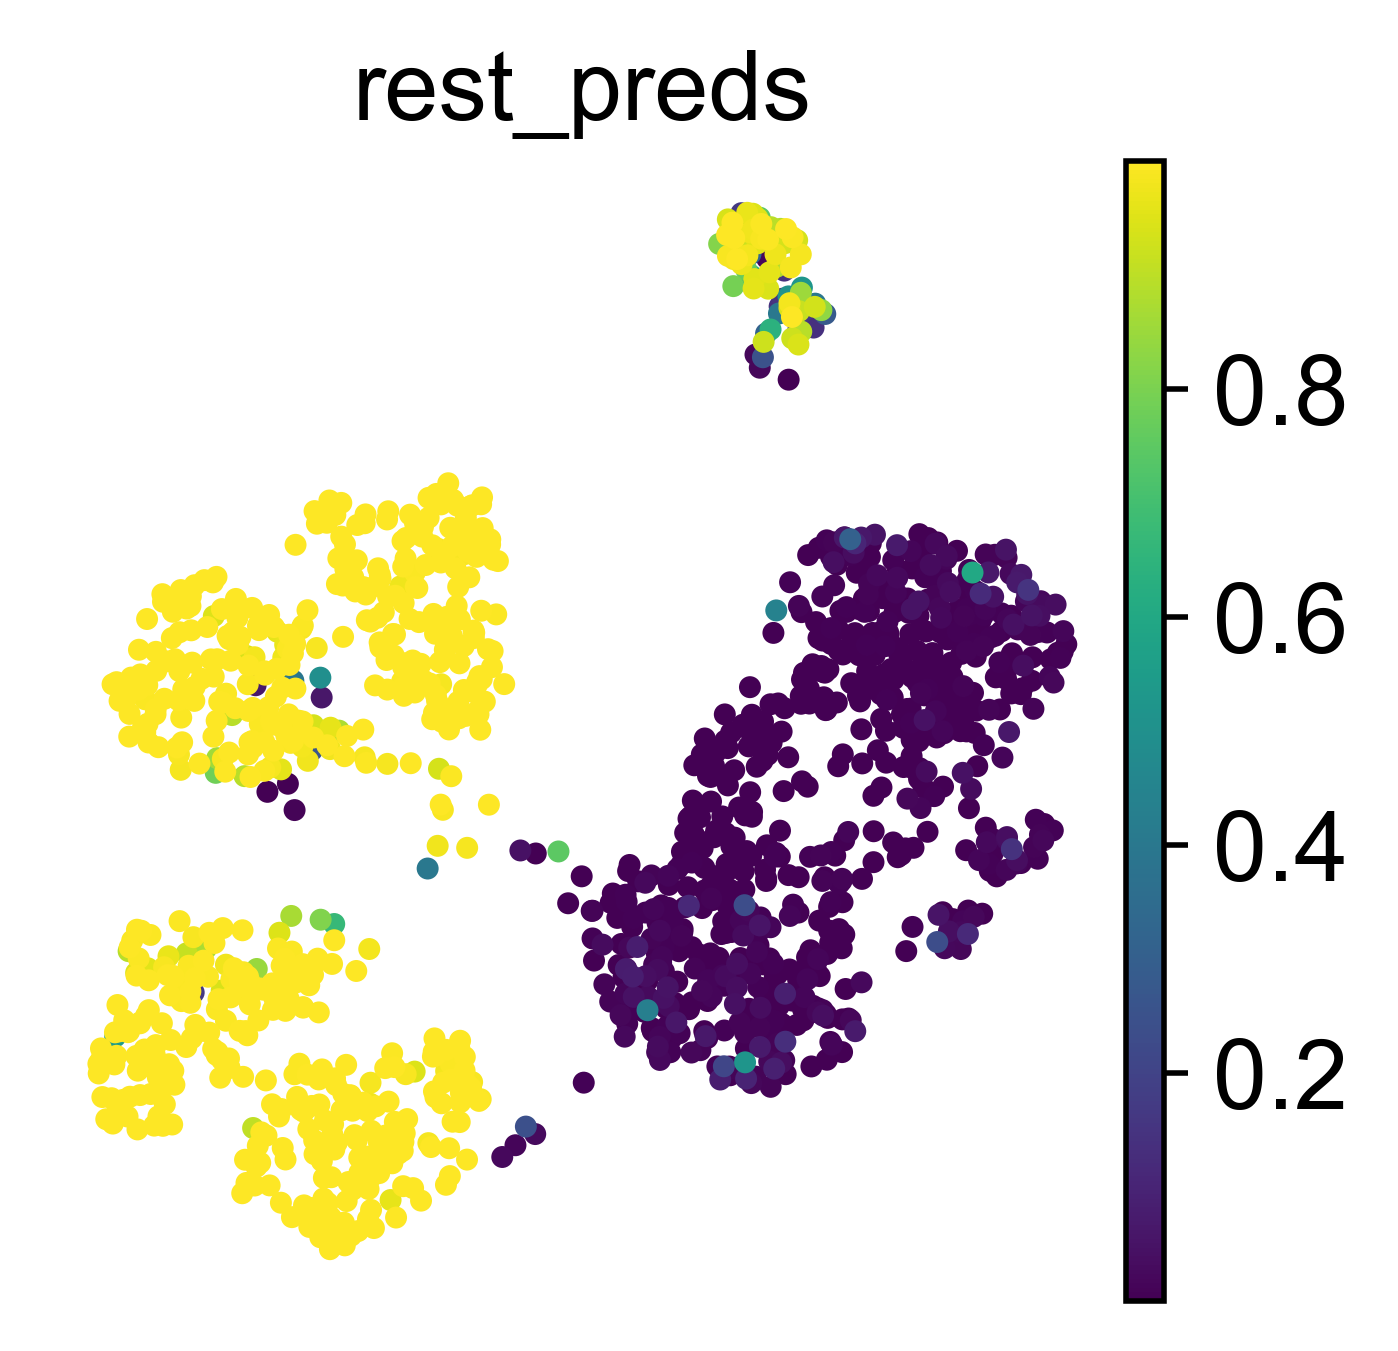

In [37]:
ax = sc.pl.umap(adata,color=["rest_preds"],size=40,palette="Paired",show=False)
plt.savefig("saved/figures/figure2A_2"+name + ".tiff")

In [38]:
adata.obs["Sample name"]

RPI1_A3     Resistant
RPI1_A4     Resistant
RPI1_A5     Resistant
RPI1_A6     Resistant
RPI1_A7     Resistant
              ...    
RPI7_P17    Resistant
RPI7_P18    Resistant
RPI7_P19    Resistant
RPI7_P20    Resistant
RPI7_P22    Resistant
Name: Sample name, Length: 1404, dtype: category
Categories (2, object): ['Resistant', 'Sensitive']

In [39]:
# if(intested=="GSE117872_HN137"):
#     adata.obs["Sample name"] =adata.obs["Sample name"].cat.rename_categories({'HN137M':"Metastasis sensitive cells", \
#                                                     "HN137MCR":"Metastasis resistant cells",\
#                                                   'HN137P':"Primary site sensitive cells",\
#                                                   "HN137PCR":"Primary site resistant cells",\
#                                                    })


In [40]:
# if(intested=="GSE117872_HN120"):
#     adata.obs["Sample name"] =adata.obs["Sample name"].cat.rename_categories({'HN120M':"Metastasis sensitive cells", \
#                                                     "HN120MCR":"Metastasis resistant cells",\
#                                                   'HN120P':"Primary site sensitive cells",\
#                                                   "HN120PCR":"Primary site resistant cells",\
#                                                    })

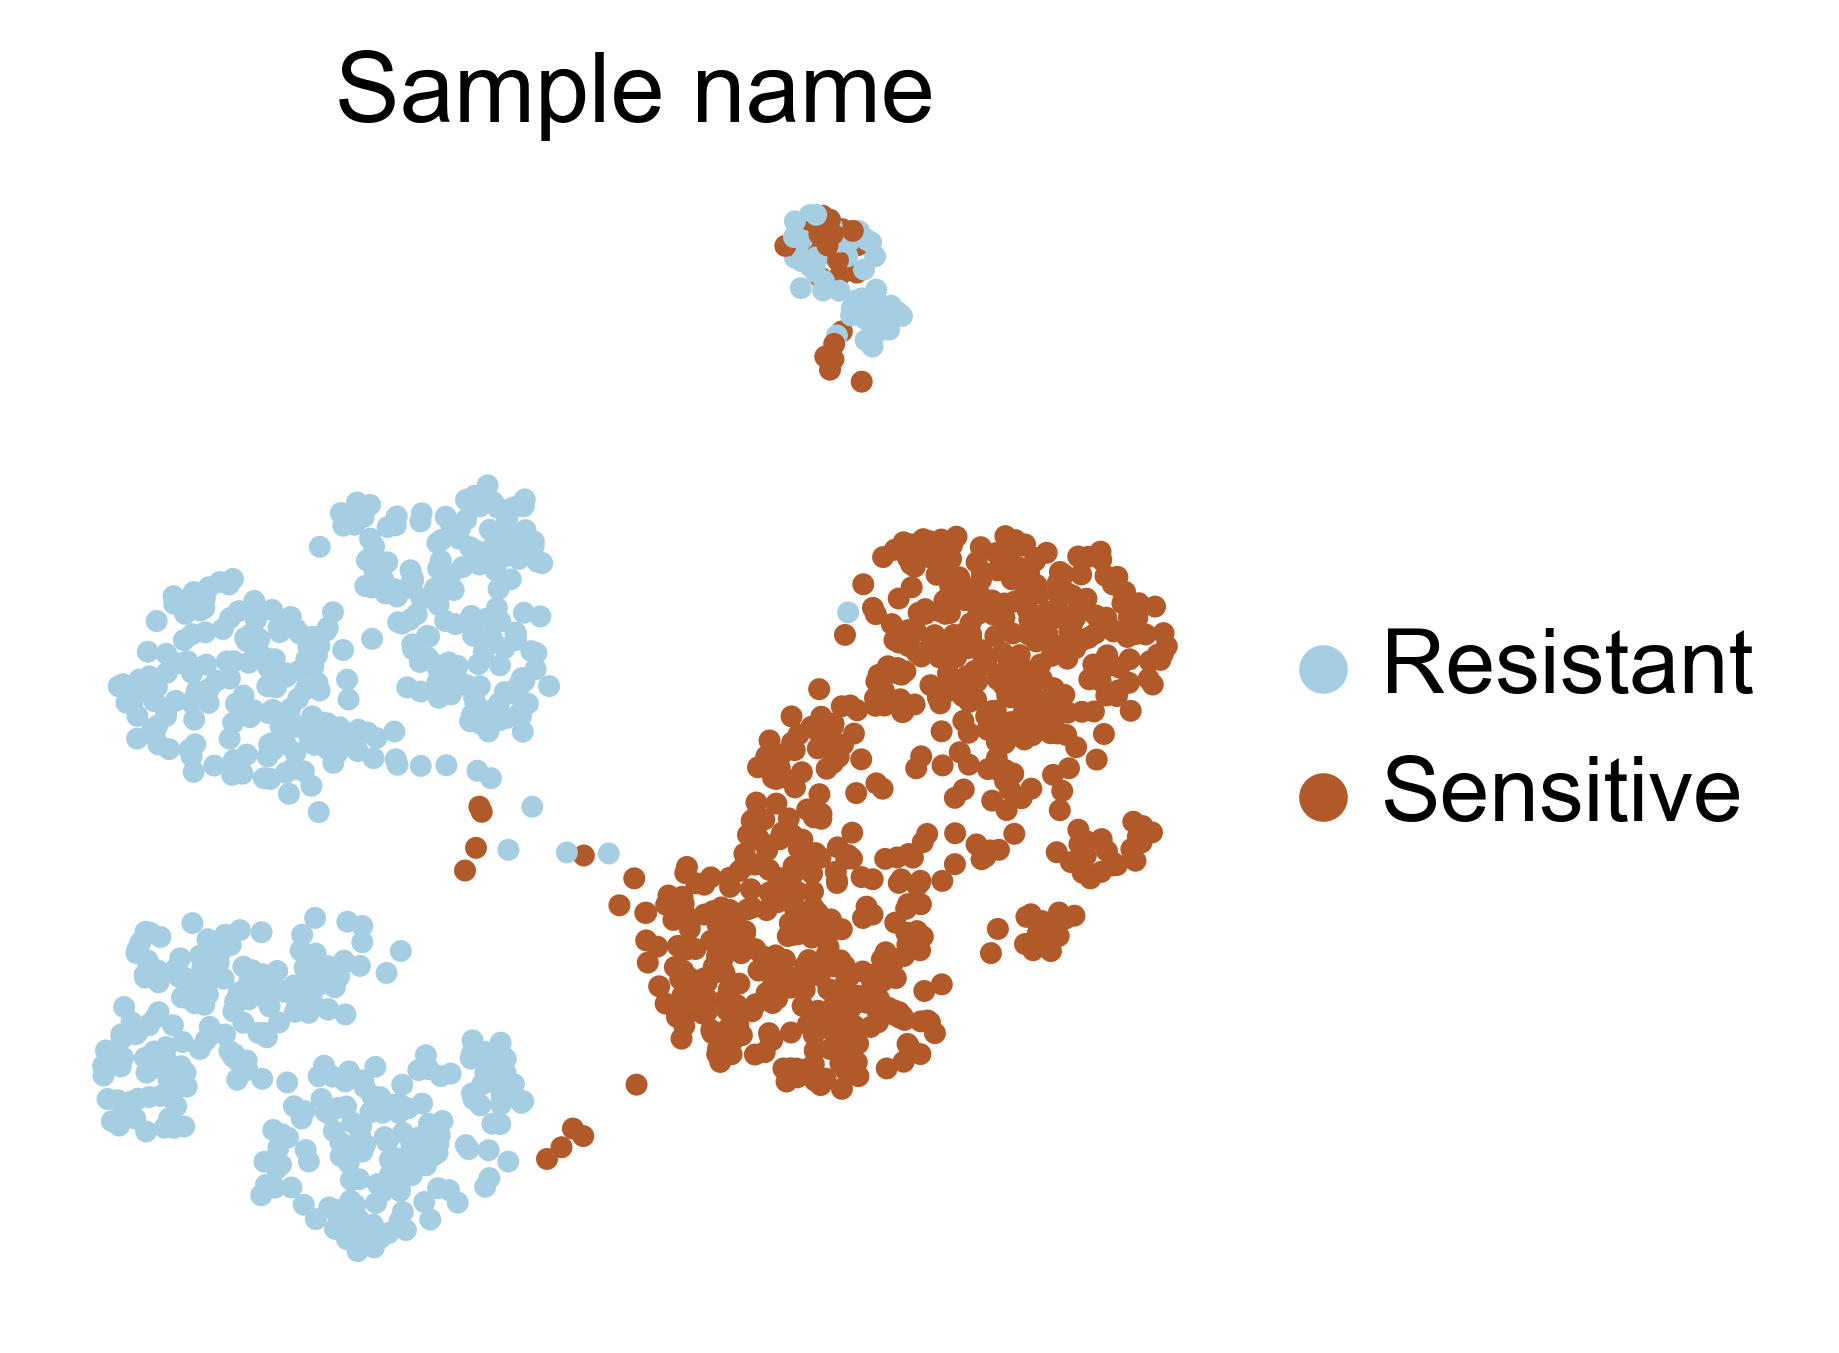

In [41]:
ax = sc.pl.umap(adata,color=["Sample name"],size=40,palette="Paired",show=False)
# ax.legend(loc ='lower center',bbox_to_anchor=(0.5, -0.55),frameon=False) 
plt.savefig("saved/figures/figure2A_3"+name + ".tiff")

In [42]:
# adata.obs.loc[adata.obs.drug_status=="Metastatic","sensitive"] = 0

# adata.obs.loc[adata.obs.drug_status=="Metastatic","Ground Truth"] = "Resistant"

In [43]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,Ground Truth,Sensitive_score,Resistant_score,n_genes,...,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,Prediction,rest_preds,0_score,1_score,wrong,pred_binary
RPI1_A3,RPI1,A3,Resistant,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,3,0.527935,1,0.000138,Resistant,0.999864,1.109898,-0.203557,NaN,0
RPI1_A4,RPI1,A4,Resistant,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,3,0.676591,1,0.000264,Resistant,0.999738,1.048748,-0.131910,NaN,0
RPI1_A5,RPI1,A5,Resistant,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,3,0.746028,1,0.006229,Resistant,0.993606,0.994504,-0.180628,NaN,0
RPI1_A6,RPI1,A6,Resistant,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,3,0.387372,0,0.000051,Resistant,0.999950,1.115945,-0.245210,NaN,0
RPI1_A7,RPI1,A7,Resistant,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,3,0.493321,0,0.000098,Resistant,0.999904,1.205736,-0.238544,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P17,RPI7,P17,Resistant,GR-,GTCACGTA,0,Resistant,-1.414444,7.688226,5183,...,1,0.104751,0,0.000162,Resistant,0.999839,1.122292,-0.198176,NaN,0
RPI7_P18,RPI7,P18,Resistant,GR-,ACGTGTGT,0,Resistant,-1.348788,8.079032,5421,...,1,0.476262,0,0.001626,Resistant,0.998354,1.037778,-0.238987,NaN,0
RPI7_P19,RPI7,P19,Resistant,GR-,TCAGCGTA,0,Resistant,-1.234040,8.462097,5293,...,1,0.315842,0,0.000260,Resistant,0.999741,1.276316,-0.233136,NaN,0
RPI7_P20,RPI7,P20,Resistant,GR-,AGAAGAGG,0,Resistant,-0.823939,5.184032,4101,...,1,0.086513,0,0.006288,Resistant,0.993544,1.136913,-0.189650,NaN,0


In [44]:
# report_df = {}
# Y_test = adata.obs['sensitive']
# sens_pb_results = adata.obs['sens_preds']
# lb_results = adata.obs['pred_binary']

# #Y_test ture label
# ap_score = average_precision_score(Y_test, sens_pb_results)
# # ap_umap = average_precision_score(Y_test, sens_pb_umap)
# # ap_tsne = average_precision_score(Y_test, sens_pb_tsne)

# roc_score = roc_auc_score(Y_test, sens_pb_results)

# report_dict = classification_report(Y_test, lb_results, output_dict=True)
# f1score = report_dict['weighted avg']['f1-score']

In [45]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,Ground Truth,Sensitive_score,Resistant_score,n_genes,...,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,Prediction,rest_preds,0_score,1_score,wrong,pred_binary
RPI1_A3,RPI1,A3,Resistant,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,3,0.527935,1,0.000138,Resistant,0.999864,1.109898,-0.203557,NaN,0
RPI1_A4,RPI1,A4,Resistant,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,3,0.676591,1,0.000264,Resistant,0.999738,1.048748,-0.131910,NaN,0
RPI1_A5,RPI1,A5,Resistant,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,3,0.746028,1,0.006229,Resistant,0.993606,0.994504,-0.180628,NaN,0
RPI1_A6,RPI1,A6,Resistant,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,3,0.387372,0,0.000051,Resistant,0.999950,1.115945,-0.245210,NaN,0
RPI1_A7,RPI1,A7,Resistant,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,3,0.493321,0,0.000098,Resistant,0.999904,1.205736,-0.238544,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P17,RPI7,P17,Resistant,GR-,GTCACGTA,0,Resistant,-1.414444,7.688226,5183,...,1,0.104751,0,0.000162,Resistant,0.999839,1.122292,-0.198176,NaN,0
RPI7_P18,RPI7,P18,Resistant,GR-,ACGTGTGT,0,Resistant,-1.348788,8.079032,5421,...,1,0.476262,0,0.001626,Resistant,0.998354,1.037778,-0.238987,NaN,0
RPI7_P19,RPI7,P19,Resistant,GR-,TCAGCGTA,0,Resistant,-1.234040,8.462097,5293,...,1,0.315842,0,0.000260,Resistant,0.999741,1.276316,-0.233136,NaN,0
RPI7_P20,RPI7,P20,Resistant,GR-,AGAAGAGG,0,Resistant,-0.823939,5.184032,4101,...,1,0.086513,0,0.006288,Resistant,0.993544,1.136913,-0.189650,NaN,0


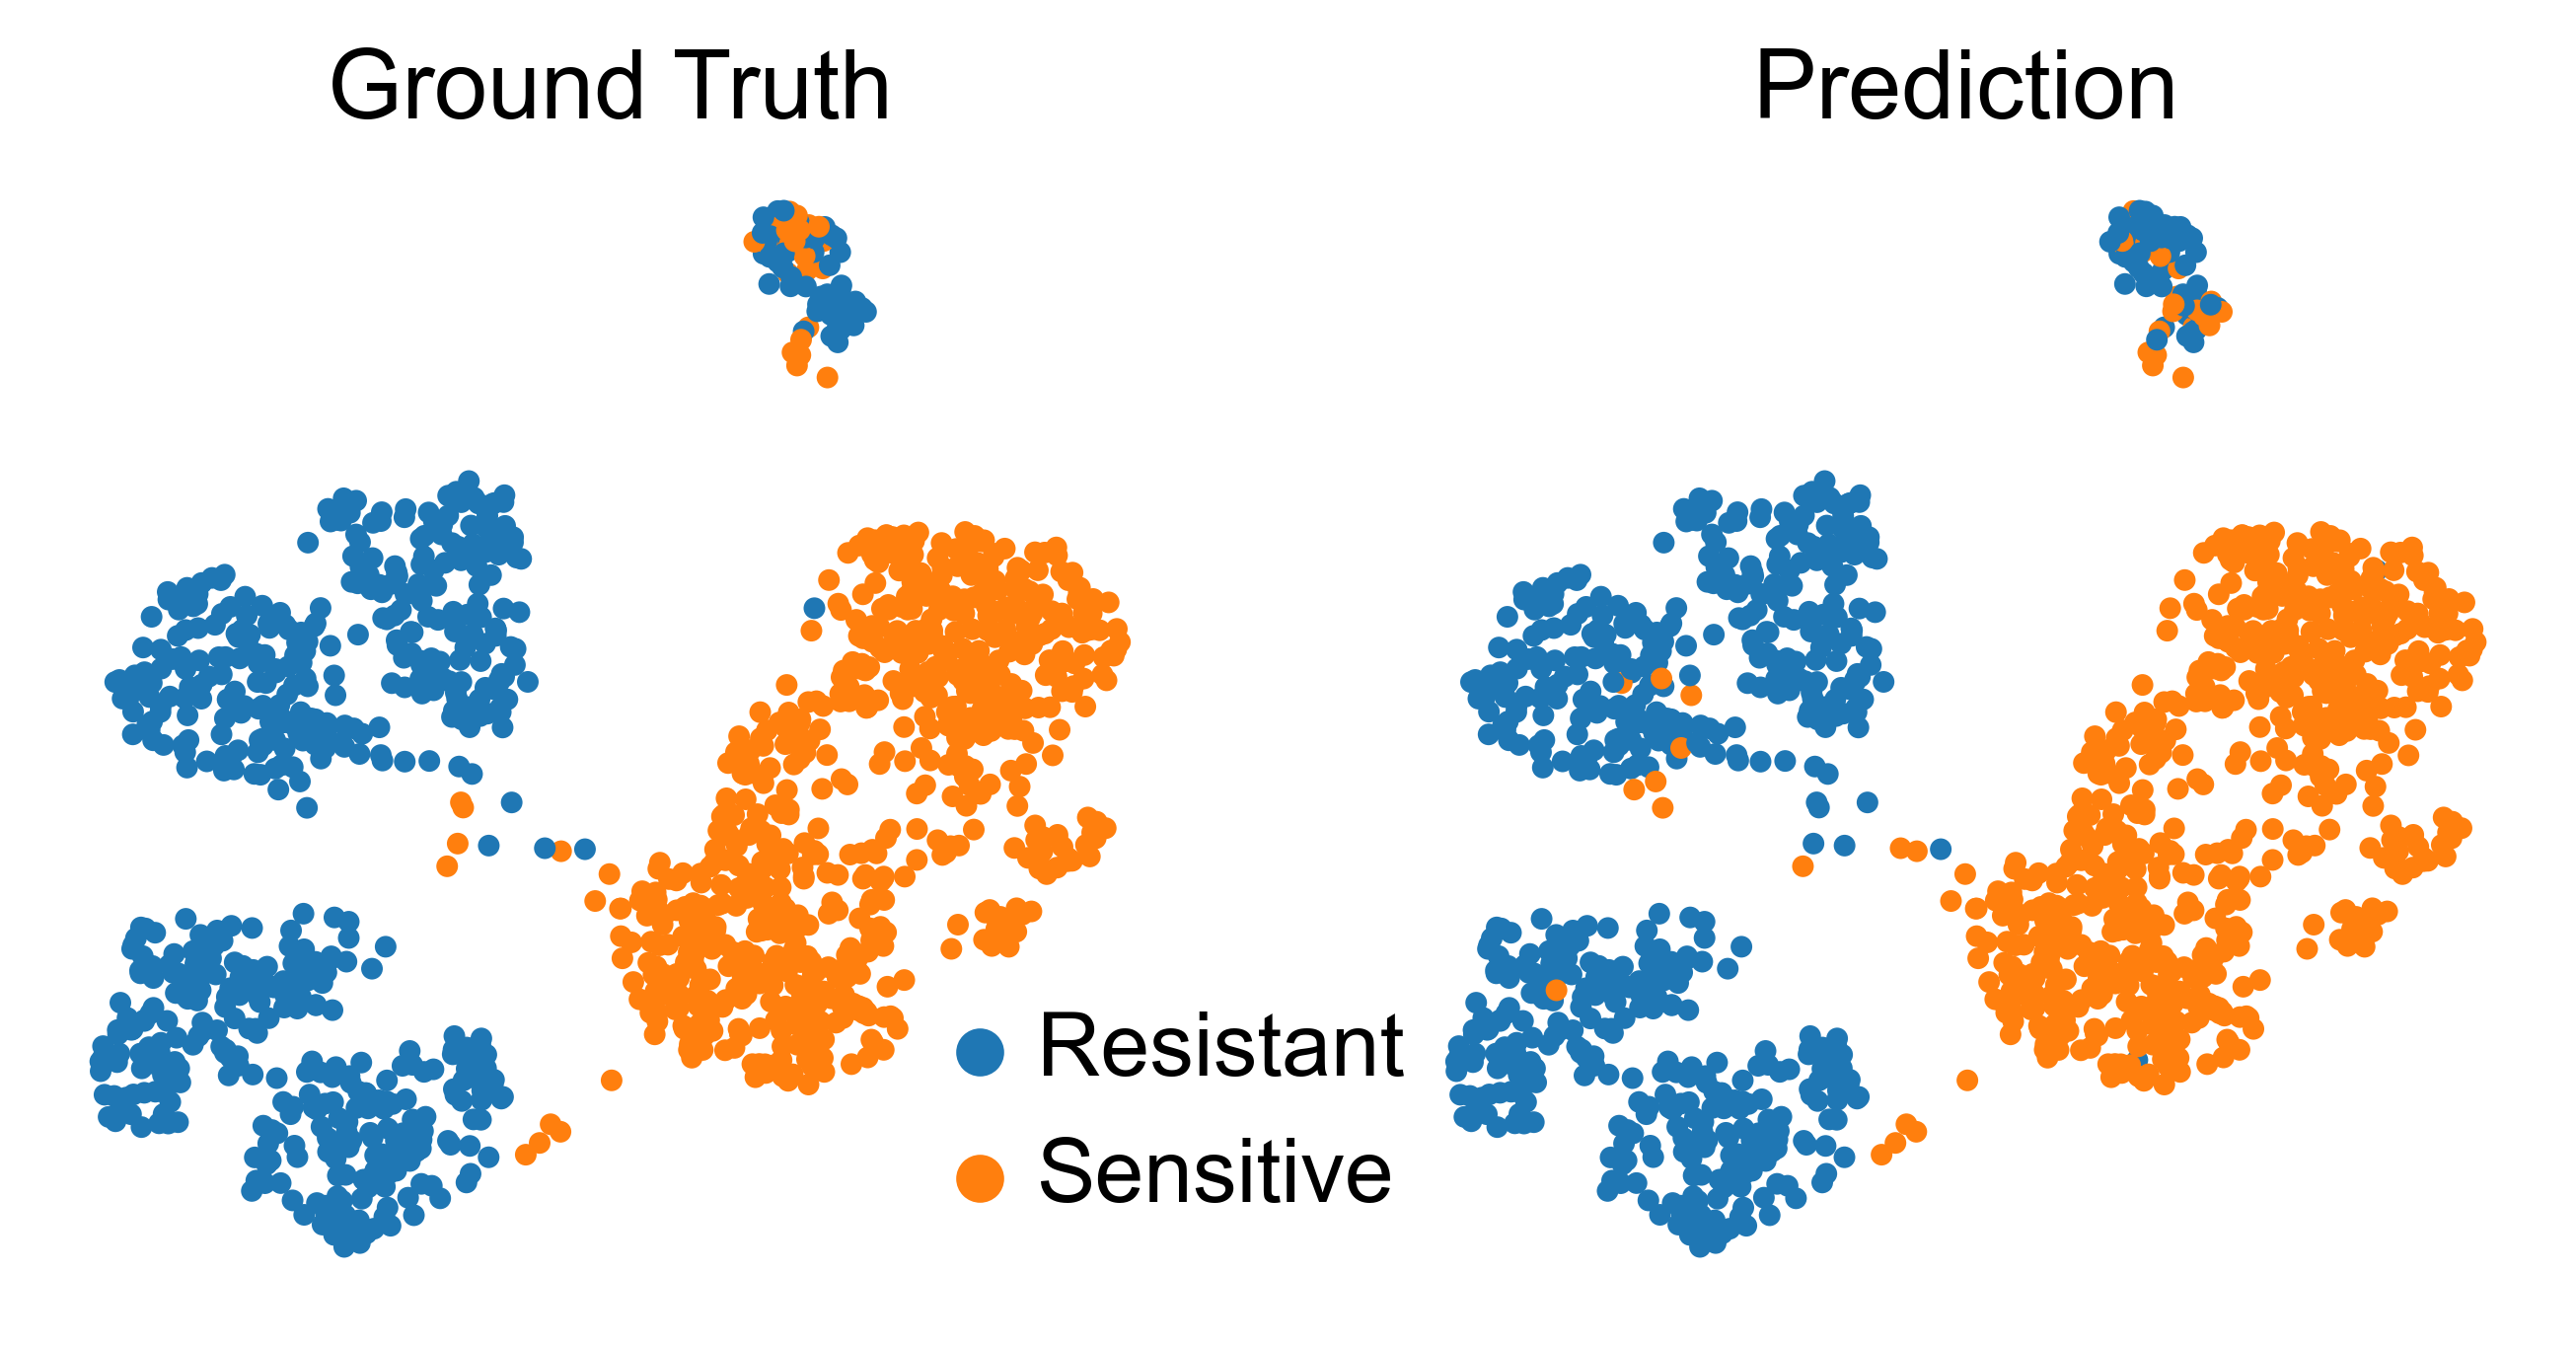

In [46]:
sc.settings.set_figure_params(dpi=250, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures
ax = sc.pl.umap(adata,color=['Ground Truth',"Prediction"],size=40,show=False,wspace=0.1)
ax[0].legend().remove()
ax[1].legend(loc ='lower center',bbox_to_anchor=(-0.2, 0),frameon=False) 
plt.savefig("saved/figures/figure2A_1"+name + ".tiff")

In [47]:
report_dict

{'0': {'precision': 0.9565846599131693,
  'recall': 0.964963503649635,
  'f1-score': 0.9607558139534884,
  'support': 685},
 '1': {'precision': 0.967032967032967,
  'recall': 0.9591280653950953,
  'f1-score': 0.963064295485636,
  'support': 734},
 'accuracy': 0.9619450317124736,
 'macro avg': {'precision': 0.9618088134730682,
  'recall': 0.9620457845223651,
  'f1-score': 0.9619100547195623,
  'support': 1419},
 'weighted avg': {'precision': 0.9619892106009293,
  'recall': 0.9619450317124736,
  'f1-score': 0.9619499122231123,
  'support': 1419}}

In [48]:
ax = sc.pl.umap(adata,color=['Ground Truth',"Prediction","Sample name"],size=25,palette="Paired",show=False)
ax[0].legend(loc ='lower center',bbox_to_anchor=(0.5, -0.25)) 
ax[1].legend(loc ='lower center',bbox_to_anchor=(0.5, -0.25)) 
ax[2].legend(loc ='lower center',bbox_to_anchor=(0.5, -0.5)) 
plt.savefig("figure2A_compare"+name + ".tiff")
plt.close()

In [49]:
adata.obs.columns

Index(['Plate#', 'Well position', 'Sample name', 'Index-Sort condition',
       'Well index', 'sensitive', 'Ground Truth', 'Sensitive_score',
       'Resistant_score', 'n_genes', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt-', 'pct_counts_mt-', 'total_counts_rps',
       'pct_counts_rps', 'total_counts_rpl', 'pct_counts_rpl', 'leiden',
       'leiden_origin', 'sens_preds_pret', 'sens_label_pret', 'sens_preds',
       'Prediction', 'rest_preds', '0_score', '1_score', 'wrong',
       'pred_binary'],
      dtype='object')

In [50]:
adata = ut.de_score(adata,clustername='pred_binary')

In [51]:
adata.obs

,Plate#,Well position,Sample name,Index-Sort condition,Well index,sensitive,Ground Truth,Sensitive_score,Resistant_score,n_genes,...,leiden_origin,sens_preds_pret,sens_label_pret,sens_preds,Prediction,rest_preds,0_score,1_score,wrong,pred_binary
RPI1_A3,RPI1,A3,Resistant,GR+,GGTCTATG,0,Resistant,-2.726364,14.205806,7132,...,3,0.527935,1,0.000138,Resistant,0.999864,1.109898,-0.203557,NaN,0
RPI1_A4,RPI1,A4,Resistant,GR+,GTCCGAAT,0,Resistant,-2.200808,10.421614,6815,...,3,0.676591,1,0.000264,Resistant,0.999738,1.048748,-0.131910,NaN,0
RPI1_A5,RPI1,A5,Resistant,GR+,TAGTGCGT,0,Resistant,-1.273636,5.788548,4951,...,3,0.746028,1,0.006229,Resistant,0.993606,0.994504,-0.180628,NaN,0
RPI1_A6,RPI1,A6,Resistant,GR+,GACTGTAC,0,Resistant,-3.492323,16.025484,7615,...,3,0.387372,0,0.000051,Resistant,0.999950,1.115945,-0.245210,NaN,0
RPI1_A7,RPI1,A7,Resistant,GR+,TCCAGTAG,0,Resistant,-2.236667,13.070160,6688,...,3,0.493321,0,0.000098,Resistant,0.999904,1.205736,-0.238544,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPI7_P17,RPI7,P17,Resistant,GR-,GTCACGTA,0,Resistant,-1.414444,7.688226,5183,...,1,0.104751,0,0.000162,Resistant,0.999839,1.122292,-0.198176,NaN,0
RPI7_P18,RPI7,P18,Resistant,GR-,ACGTGTGT,0,Resistant,-1.348788,8.079032,5421,...,1,0.476262,0,0.001626,Resistant,0.998354,1.037778,-0.238987,NaN,0
RPI7_P19,RPI7,P19,Resistant,GR-,TCAGCGTA,0,Resistant,-1.234040,8.462097,5293,...,1,0.315842,0,0.000260,Resistant,0.999741,1.276316,-0.233136,NaN,0
RPI7_P20,RPI7,P20,Resistant,GR-,AGAAGAGG,0,Resistant,-0.823939,5.184032,4101,...,1,0.086513,0,0.006288,Resistant,0.993544,1.136913,-0.189650,NaN,0


In [52]:
sens_score,s_pval = pearsonr(adata.obs["1_score"],adata.obs["Sensitive_score"])
resistant_score,r_pval = pearsonr(adata.obs["0_score"],adata.obs["Resistant_score"])

In [53]:
intested

'GSE110894'

In [54]:
df_scores=adata.obs.loc[:,["1_score","0_score","Sensitive_score","Resistant_score","Prediction"]]
df_scores.to_csv(intested+"_score.csv")

In [ ]:
ax = sc.pl.umap(adata,color=["1_score","Sensitive_score"],size=40,palette="Set2",show=False)
ax[0].legend(loc ='lower center',bbox_to_anchor=(0.5, -0.55),frameon=False) 
ax[1].legend(loc ='lower center',bbox_to_anchor=(0.5, -0.55),frameon=False) 
plt.savefig("saved/figures/figure2A_4"+name + ".tiff")
plt.clf()

In [ ]:
ax = sc.pl.umap(adata,color=["0_score","Resistant_score"],size=40,palette="flare",show=False)
ax[0].legend(loc ='lower center',bbox_to_anchor=(0.5, -0.55),frameon=False) 
ax[1].legend(loc ='lower center',bbox_to_anchor=(0.5, -0.55),frameon=False) 
plt.savefig("saved/figures/figure2A_5"+name + ".tiff")
plt.clf()

In [ ]:

def ran_test_score(adata,n_iters=1000):
    ran_results1 = []
    ran_results2 = []

    s_score,s_pval = pearsonr(adata.obs["1_score"],adata.obs["Sensitive_score"])
    r_score,r_pval = pearsonr(adata.obs["0_score"],adata.obs["Resistant_score"])


    for i in range(0,n_iters):

        gl1 = random.sample(list(adata.var.index),50)
        adata=sc.tl.score_genes(adata, gene_list=gl1,score_name="l1_score",copy=True)

        rand_score1,rand_pval1 = pearsonr(adata.obs["l1_score"],adata.obs["Sensitive_score"])
        rand_score2,rand_pval2 = pearsonr(adata.obs["l1_score"],adata.obs["Resistant_score"])

        ran_results1.append(rand_score1)
        ran_results2.append(rand_score2)
        
        
    return adata,ran_results1, s_score,s_pval ,ran_results2,r_score,r_pval

In [ ]:
adata,s_ran, s_score,s_pval ,r_ran,r_score,r_pval = ran_test_score(adata,2)

In [ ]:
r_ran

In [ ]:
plt.hist(r_ran)
plt.xlim(xmin=-1, xmax = 1)
plt.axvline(r_score, color='r', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(r_ran), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
#plt.text(-1, max_ylim*0.7, 'Mean: {:.2f}'.format(np.mean(r_ran)))
plt.text(-0.95, max_ylim*0.8, 'p < 0.001', color='k')
plt.text(-0.95, max_ylim*0.9, 'r: {:.2f}'.format(r_score), color='k')
plt.show()

In [ ]:
plt.hist(s_ran)
plt.xlim(xmin=-1, xmax = 1)
plt.axvline(s_score, color='r', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(s_ran), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
#plt.text(-1, max_ylim*0.7, 'Mean: {:.2f}'.format(np.mean(r_ran)))
plt.text(-0.95, max_ylim*0.8, 'p < 0.001', color='k')
plt.text(-0.95, max_ylim*0.9, 'r: {:.2f}'.format(s_score), color='k')
plt.savefig("saved/figures/random_senstive_gene"+name + '.svg')
plt.show()

In [ ]:
#scaler.fit_transform(score_1.reshape(1, -1)).ravel()

In [ ]:
import scipy as sp
from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="whitegrid")

# score_1 = ig[flagnz_ig & flagnz_exp]
# score_2 = exp[flagnz_ig & flagnz_exp]


#c = adata.obs.loc[flagnz_ig,"sensitivity"].values

score_1 = adata.obs.loc[:,'Sensitive_score'].ravel()
score_2 = adata.obs.loc[:,'1_score'].ravel()
c = adata.obs.loc[:,"Ground Truth"].values


scaler = MinMaxScaler()

# score_1 =scaler.fit_transform(score_1.reshape(1, -1)).ravel()
# score_2 =scaler.fit_transform(score_2.reshape(1, -1)).ravel()



# score_1 = np.clip(score_1,np.percentile(score_1, 5),np.percentile(score_1, 95))
# score_2 = np.clip(score_2,np.percentile(score_2, 5),np.percentile(score_2, 95))

DF_0 = pd.DataFrame({"Ground truth":score_1,"Prediction":score_2,"color":c})


r, p = sp.stats.pearsonr(score_1, score_2)

line_kws={'label':"r2={0:.3f}, pval={1:.2E}".format(r,p),"color":"red"}

sns.lmplot(x='Ground truth', y='Prediction', hue='color', data=DF_0, fit_reg=False, legend=False,scatter_kws={"s":20},\
           #palette=sns.color_palette("tab10_r",10)[8:10]
           palette=sns.color_palette("tab10",2)
)

# Use regplot to plot the regression line and use line_kws to set line label for legend
#ax = sns.regplot(x="x", y="y", data=DF_0, scatter_kws={"zorder":-1},

ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws, scatter_kws={"zorder":-1,"s":20})
ax.legend(loc='upper left')
ax.figure.set_size_inches(4, 4)

sns.despine(left=False)
plt.savefig("saved/figures/Regplot_sesistive_"+name+".tiff")
plt.clf()


In [ ]:
score_1 = adata.obs.loc[:,'Resistant_score'].ravel()
score_2 = adata.obs.loc[:,'0_score'].ravel()
c = adata.obs.loc[:,"Ground Truth"].values

# score_1 = np.clip(score_1,np.percentile(score_1, 5),np.percentile(score_1, 95))
# score_2 = np.clip(score_2,np.percentile(score_2, 5),np.percentile(score_2, 95))

DF_0 = pd.DataFrame({"Ground truth":score_1,"Prediction":score_2,"color":c})


r, p = sp.stats.pearsonr(score_1, score_2)

line_kws={'label':"r2={0:.3f}, pval={1:.2E}".format(r,p),"color":"red"}

sns.lmplot(x='Ground truth', y='Prediction', hue='color', data=DF_0, fit_reg=False, legend=False,scatter_kws={"s":20},\
           #palette=sns.color_palette("tab10_r",10)[8:10]
           palette=sns.color_palette("tab10",2)

)

# Use regplot to plot the regression line and use line_kws to set line label for legend
#ax = sns.regplot(x="x", y="y", data=DF_0, scatter_kws={"zorder":-1},

ax = sns.regplot(x=score_1, y=score_2,logx=False, line_kws=line_kws, scatter_kws={"zorder":-1,"s":20})
ax.legend(loc='upper left')
ax.figure.set_size_inches(4, 4)

sns.despine(left=False)
plt.savefig("saved/figures/Regplot_resistant_"+name+".tiff")
plt.clf()

In [ ]:
r_pval